In [18]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Imagen tif

(6, 11191, 13767)
(11191, 13767, 6) 65535
image (11191, 13767, 3) 1.0


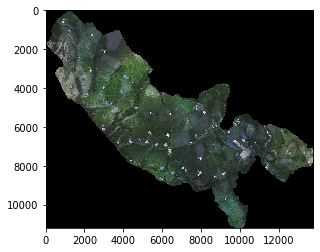

In [41]:
# 
import numpy as np
import matplotlib.pyplot as plt

from rasterio.plot import show #graficar el mapa
import rasterio

input_filename = './dataset/images/Huapra191216_100m.tif'
#image
import rasterio
image1 = rasterio.open(input_filename)
print(image1.read().shape)
arrayRGB=(image1.read().transpose(1,2,0))
print(arrayRGB.shape,arrayRGB.max())

arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max())
print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor
plt.imshow(arrayRGB)
plt.show()

mask (11867, 10604) 1 0


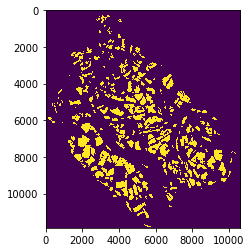

In [130]:
#mask
mask_filename='./dataset/masks/Huapra191216_100m.tif'
mask_filename='./dataset/masks/Huapra060318_escalonado1.tif'
mask1 = rasterio.open(mask_filename)
mask1.indexes
arraymask1=(mask1.read()).transpose(1,2,0)
arraymask1=(arraymask1[:,:,0]).astype(np.uint8)  #importante uint8
print('mask', arraymask1.shape,np.max(arraymask1),np.min(arraymask1)) # Ch,Hy,Wx tensor
plt.imshow(arraymask1)


images founded: (11,)
0 dataset/images/Huapra060318_escalonado1.tif
0 dataset/masks/Huapra060318_escalonado1.tif
(6, 11867, 10604)
(11867, 10604, 6) 65535
image (11867, 10604, 3) 1.0
mask (11867, 10604) 1 0


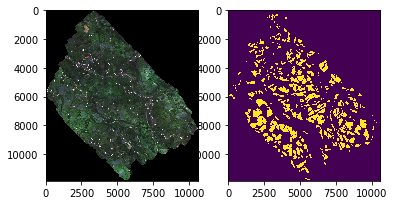

1 dataset/images/Huapra060318_escalonado2.tif
1 dataset/masks/Huapra060318_escalonado2.tif
(6, 11420, 11938)
(11420, 11938, 6) 65535
image (11420, 11938, 3) 1.0
mask (11420, 11938) 1 0


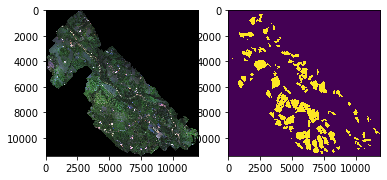

2 dataset/images/Huapra191216_100m.tif
2 dataset/masks/Huapra191216_100m.tif
(6, 11191, 13767)
(11191, 13767, 6) 65535
image (11191, 13767, 3) 1.0
mask (11191, 13767) 1 0


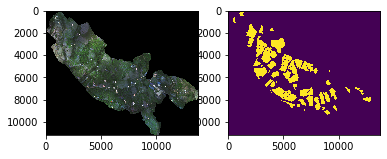

3 dataset/images/Huapra191216_180m.tif
3 dataset/masks/Huapra191216_180m.tif
(6, 6080, 6697)
(6080, 6697, 6) 65535
image (6080, 6697, 3) 1.0
mask (6080, 6697) 1 0


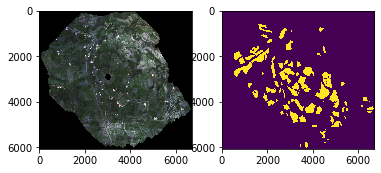

4 dataset/images/Huapra191217_100m.tif
4 dataset/masks/Huapra191217_100m.tif
(6, 10711, 11658)
(10711, 11658, 6) 65535
image (10711, 11658, 3) 1.0
mask (10711, 11658) 1 0


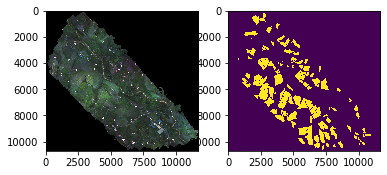

5 dataset/images/Huapra191217_180m.tif
5 dataset/masks/Huapra191217_180m.tif
(6, 8773, 8939)
(8773, 8939, 6) 65535
image (8773, 8939, 3) 1.0
mask (8773, 8939) 1 0


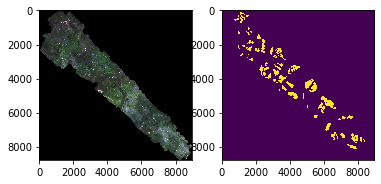

6 dataset/images/Huapra290118_100m.tif
6 dataset/masks/Huapra290118_100m.tif
(6, 10999, 12000)
(10999, 12000, 6) 65535
image (10999, 12000, 3) 1.0
mask (10999, 12000) 1 0


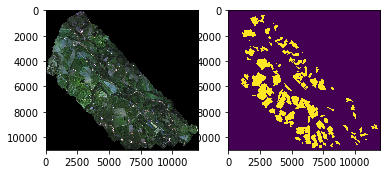

7 dataset/images/Huapra290118_300m.tif
7 dataset/masks/Huapra290118_300m.tif
(6, 7779, 7039)
(7779, 7039, 6) 65535
image (7779, 7039, 3) 1.0
mask (7779, 7039) 1 0


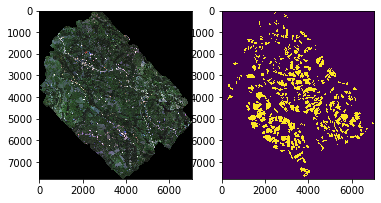

8 dataset/images/MalPaso201217_180m.tif
8 dataset/masks/MalPaso201217_180m.tif
(6, 10339, 7186)
(10339, 7186, 6) 65535
image (10339, 7186, 3) 1.0
mask (10339, 7186) 1 0


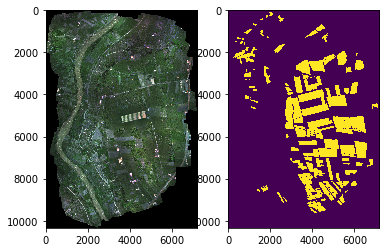

9 dataset/images/MalPaso310118_100m.tif
9 dataset/masks/MalPaso310118_100m.tif
(5, 21132, 12598)
(21132, 12598, 5) 65535
image (21132, 12598, 3) 1.0
mask (21132, 12598) 1 0


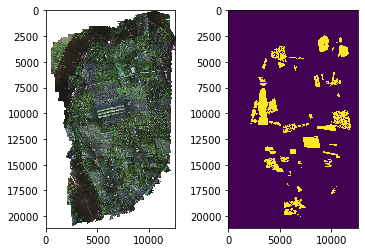

10 dataset/images/MalPaso310118_180m.tif
10 dataset/masks/MalPaso310118_180m.tif
(6, 11188, 6422)
(11188, 6422, 6) 65535
image (11188, 6422, 3) 1.0
mask (11188, 6422) 1 0


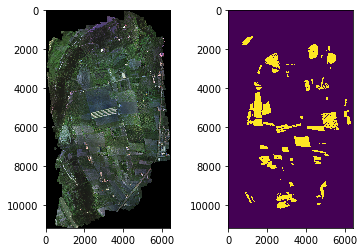

In [132]:
import rasterio

dataset_images=np.array(sorted(glob.glob(str(data_path/'images')+ "/*.tif")))

    
    #np.array(sorted(list(predict_list.glob('*_fake.png'))))

print('images founded:', dataset_images.shape)
for i, input_path in enumerate(dataset_images):
     
    print(i,input_path)
    mask_path =input_path.replace('images','masks')
    print(i,mask_path)        
    index_imgs=i
   ############ imagen #######################
    image1 = rasterio.open(input_path)
    print(image1.read().shape)
    arrayRGB=(image1.read().transpose(1,2,0))
    print(arrayRGB.shape,arrayRGB.max())

    arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max())
    print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor
    plt.subplot(1,2,1)
    plt.imshow(arrayRGB)

    ############ masks #########################
    mask1 = rasterio.open(mask_path)
    mask1.indexes
    arraymask1=(mask1.read()).transpose(1,2,0)
    arraymask1=(arraymask1[:,:,0]).astype(np.uint8)  #importante uint8
    print('mask', arraymask1.shape,np.max(arraymask1),np.min(arraymask1)) # Ch,Hy,Wx tensor

    plt.subplot(1,2,2)
    plt.imshow(arraymask1)
    plt.show()



# Crop images and masks

In [133]:
!python create_dataset.py

Cortando pathes----------------
out_path_images dataset/data_512/images
images founded: (11,)
0 dataset/images/Huapra060318_escalonado1.tif
0 dataset/masks/Huapra060318_escalonado1.tif
Images-elapsed time: 10.180143458768725
Masks-elapsed time: 1.7917323531582952
1 dataset/images/Huapra060318_escalonado2.tif
1 dataset/masks/Huapra060318_escalonado2.tif
Images-elapsed time: 10.080464838072658
Masks-elapsed time: 1.8785868752747774
2 dataset/images/Huapra191216_100m.tif
2 dataset/masks/Huapra191216_100m.tif
Images-elapsed time: 12.367449577897787
Masks-elapsed time: 3.8356720050796866
3 dataset/images/Huapra191216_180m.tif
3 dataset/masks/Huapra191216_180m.tif
Images-elapsed time: 5.446774994023144
Masks-elapsed time: 0.898420849815011
4 dataset/images/Huapra191217_100m.tif
4 dataset/masks/Huapra191217_100m.tif
Images-elapsed time: 14.250945647247136
Masks-elapsed time: 3.4971238104626536
5 dataset/images/Huapra191217_180m.tif
5 dataset/masks/Huapra191217_180m.tif
Images-elapsed time: 6.

# Creation of  train and val set

In [18]:
# change the data path here
data_HR_path= Path('data_corn_160') 
images_path=str(data_HR_path/'data'/'images')

#Names to the files
train_val_file='train_val_160'
test_file='test_160'
percent_test=0.10 #10%

split_train_test(original_dataset_dir= images_path, 
                 base_dir = str(data_HR_path),
                 test_split = percent_test, 
                 train_file=train_val_file,
                 test_file=test_file)

27474 24727 2747
data_corn_160/train_val_160/images
data_corn_160/test_160/images


# Plot  images + mask

In [31]:
def mask_overlay(image, mask, color=(15, 15, 0)):
    """
    Helper function to visualize mask over the img
    """
    print(mask.shape)      
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.float32)
    weighted_sum = cv2.addWeighted(mask, 0.3, image, 0.7, 0.)
    img = image.copy()
    ind = mask[:, :, 0] > 0  
    img[ind] = weighted_sum[ind]

    return img

def plot_img_mask(img_path):
    img = np.load(str(img_path))

    print(np.shape(img),np.min(img),np.max(img))

    img2 = (img[:,:,:3].astype(np.float32))/np.max(img)
    #inp = (img*255).astype(np.uint8)
    mask = np.load(str(img_path).replace('images', 'masks').replace(r'.npy', r'_a.npy'), 0)
    
    #mask=mask.reshape(mask.shape[1],-1)
    mask =np .max(mask, axis=2)  #convert of 3 channel to 1 channel
    mask=(mask > 0).astype(np.uint8)
    #mask=(mask > 0).astype(np.float32)

    fig = plt.figure(figsize=(30, 30))  
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    ax1=plt.subplot(131)
    ax1.imshow(img2)
    ax2=plt.subplot(132)
    ax2.imshow(mask)

    ax3=plt.subplot(133)
    ax3.imshow(mask_overlay(img2, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 512, 512) 0.0 1.0
(1, 512)


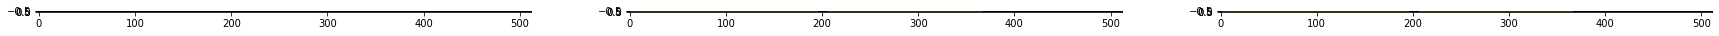

In [32]:
img_path ="dataset/data_160/images/0_0-5120.npy"
plot_img_mask(img_path)


## Find some parameters of the data: max,std

In [21]:
import glob  ###
import os
from get_train_test_kfold import get_split_out, percent_split, get_split_in
from scalarmeanstd import meanstd

data_path= Path('data_corn_160') 
train_val_file='train_val_160'
test_file='test_160'
input_channels=6
train_val_file_names=np.array(sorted(glob.glob(str(data_path/train_val_file/'images')+ "/*.npy")))
test_file_names =  np.array(sorted(glob.glob(str(data_path/test_file/'images') + "/*.npy")))
    
train_file_names,val_file_names = get_split_in(train_val_file_names,0)
max_values, mean_values, std_values=meanstd(train_file_names, val_file_names,test_file_names,str(data_path),input_channels) #_60 
print(max_values, mean_values, std_values)


ValueError: operands could not be broadcast together with shapes (6,) (5,) (6,) 

## Predictions unlabel images

117


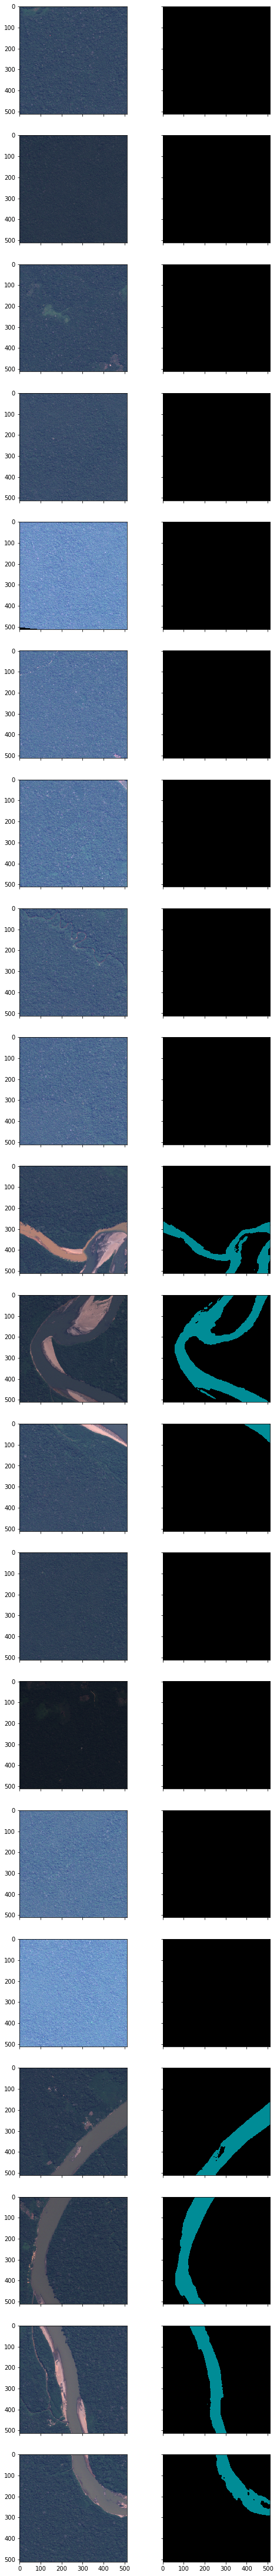

In [18]:
##
from unlabeled_plotting import plot_prediction
path_model_VHR='logs_VHR/mapping/model_40epoch_100_percent_UNet11_fold0.pth'
file_unlabel='images_jungle'
plot_prediction(path_model=path_model_VHR,unlabel_name_file=file_unlabel)